C:\Users\esdra\AppData\Local\Temp\ipykernel_11884\2424234802.py:19: RuntimeWarning: divide by zero encountered in log
  return np.exp(alpha * np.log(z / z0))


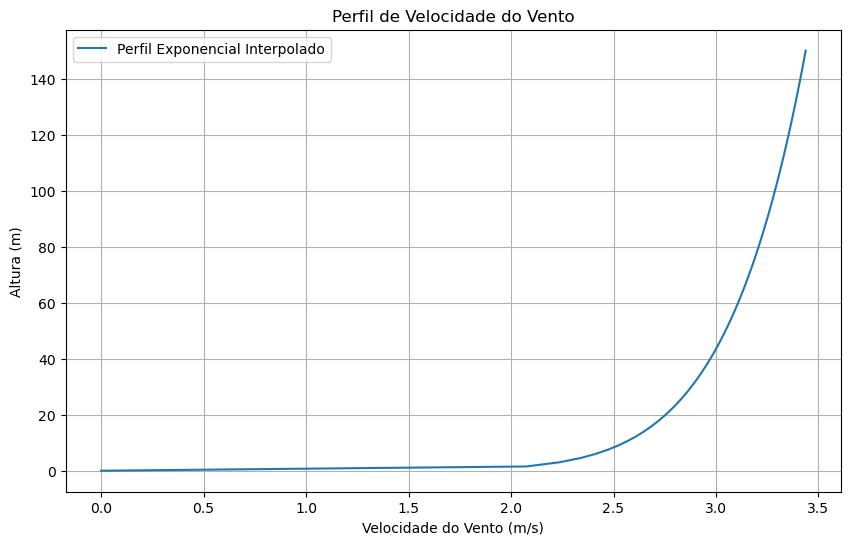

    Altura (m)  Velocidade do Vento (m/s)
0     0.000000                   0.000000
1     1.515152                   2.073657
2     3.030303                   2.237949
3     4.545455                   2.340023
4     6.060606                   2.415258
..         ...                        ...
95  143.939394                   3.422051
96  145.454545                   3.425995
97  146.969697                   3.429902
98  148.484848                   3.433774
99  150.000000                   3.437611

[100 rows x 2 columns]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Função para o perfil exponencial
def exp_profile(z, z0, alpha):
    """
    Calcula a velocidade do vento para o perfil exponencial.

    Args:
    z (array): Alturas onde a velocidade do vento será calculada.
    z0 (float): Comprimento de rugosidade.
    alpha (float): Parâmetro de ajuste.

    Returns:
    array: Velocidade do vento para cada altura z.
    """
    return np.exp(alpha * np.log(z / z0))

# Dados de velocidade média por altura
alturas = np.array([11.67, 34.11, 57.13, 80.77, 130.03])  # Alturas em metros
velocidades = np.array([8.36, 8.79, 8.79, 8.24, 6.95])  # Velocidades médias em m/s

# Alturas interpoladas
alturas_interp = np.linspace(0, 150, 100)

# Interpolação das velocidades médias
vel_interp = interp1d(alturas, velocidades, kind='linear', fill_value='extrapolate')
velocidades_interp = vel_interp(alturas_interp)

# Parâmetros para o perfil exponencial
z0_exp = 0.002  # Comprimento de rugosidade para o perfil exponencial
alpha_exp = 0.11  # Coeficiente admensional de cisalhamento - 0,11 para superfícies lisas e 0,34 para grandes densidades urbanas.

# Velocidade do vento para o perfil exponencial
u_exp_interp = exp_profile(alturas_interp, z0_exp, alpha_exp)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(u_exp_interp, alturas_interp, label='Perfil Exponencial Interpolado')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Altura (m)')
plt.title('Perfil de Velocidade do Vento')
plt.legend()
plt.grid(True)
plt.show()

# Criando um DataFrame com os dados
df = pd.DataFrame({'Altura (m)': alturas_interp, 'Velocidade do Vento (m/s)': u_exp_interp})

# Salvando os dados em um arquivo CSV
df.to_csv('dados_velocidade_altura.csv', index=False)

# Exibindo a tabela de resultados
print(df)


Alpha ótimo encontrado: 0.24565925519508947


C:\Users\esdra\AppData\Local\Temp\ipykernel_3804\1043752186.py:19: RuntimeWarning: divide by zero encountered in log
  return np.exp(alpha * np.log(z / z0))


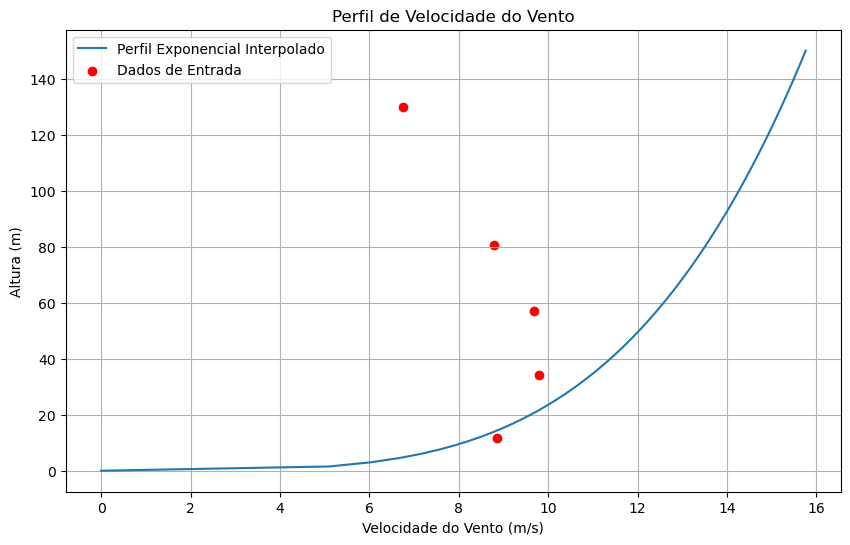

    Altura (m)  Velocidade do Vento (m/s)  Zero_1  Zero_2
0     0.000000                   0.000000       0       0
1     1.515152                   5.097505       0       0
2     3.030303                   6.043778       0       0
3     4.545455                   6.676778       0       0
4     6.060606                   7.165711       0       0
..         ...                        ...     ...     ...
95  143.939394                  15.602844       0       0
96  145.454545                  15.643032       0       0
97  146.969697                  15.682906       0       0
98  148.484848                  15.722470       0       0
99  150.000000                  15.761731       0       0

[100 rows x 4 columns]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd

# Função para o perfil exponencial
def exp_profile(z, z0, alpha):
    """
    Calcula a velocidade do vento para o perfil exponencial.

    Args:
    z (array): Alturas onde a velocidade do vento será calculada.
    z0 (float): Comprimento de rugosidade.
    alpha (float): Parâmetro de ajuste.

    Returns:
    array: Velocidade do vento para cada altura z.
    """
    return np.exp(alpha * np.log(z / z0))

# Função de erro para o ajuste de mínimos quadrados
def error_function(alpha, alturas, velocidades):
    """
    Função de erro para o ajuste de mínimos quadrados.

    Args:
    alpha (float): Parâmetro de ajuste.
    alturas (array): Alturas onde a velocidade do vento é medida.
    velocidades (array): Velocidades médias do vento correspondentes às alturas.

    Returns:
    float: Soma dos quadrados dos resíduos.
    """
    z0_exp = 0.01  # Comprimento de rugosidade para o perfil exponencial
    u_exp = exp_profile(alturas, z0_exp, alpha)
    return np.sum((u_exp - velocidades) ** 2)

# Dados de velocidade média por altura
alturas = np.array([11.67, 34.11, 57.13, 80.77, 130.03])  # Alturas em metros
velocidades = np.array([8.8539, 9.8010, 9.6833, 8.7792, 6.7446])  # Velocidades médias em m/s

# Encontrar o valor ótimo de alpha usando mínimos quadrados
result = minimize(error_function, x0=0.14, args=(alturas, velocidades))
alpha_optimo = result.x[0]

print("Alpha ótimo encontrado:", alpha_optimo)

# Alturas interpoladas
alturas_interp = np.linspace(0, 150, 100)

# Velocidade do vento para o perfil exponencial com alpha ótimo
u_exp_interp = exp_profile(alturas_interp, 0.002, alpha_optimo)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(u_exp_interp, alturas_interp, label='Perfil Exponencial Interpolado')
plt.scatter(velocidades, alturas, color='red', label='Dados de Entrada')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Altura (m)')
plt.title('Perfil de Velocidade do Vento')
plt.legend()
plt.grid(True)
plt.show()

# Criando um DataFrame com os dados
df = pd.DataFrame({'Altura (m)': alturas_interp, 'Velocidade do Vento (m/s)': u_exp_interp, 'Zero_1': 0, 'Zero_2': 0})

# Salvando os dados em um arquivo CSV
df.to_csv('Uprofile.csv', index=False, header=False)

# Exibindo a tabela de resultados
print(df)
